Einbinden der verwendeten Klassen, nicht zwingend notwendig.

In [1]:
#include <iostream>
#include "TGraphErrors.h"
#include "TF1.h"

Die aufgenommenen Datenpaare werden als `double value` in zwei Arrays gespeichert.

In [2]:
double xValues[] = {50.,60.,70.,72.,74.,76.,78.,80.,90.,100.};
double yValues[] = {7000,7000,7000,7300,9540, 12320, 13600, 14000,14000,14000};

Um sicher zu gehen, dass die Arrays die gleiche länge haben vergleichen wir diese. Da wir bei standart `c++` arrays keine Möglichkeit haben die länge direkt abzufragen gehen wir einen umweg und schauen wie of das erste Element in das gesammte Array passt. Im Fall, dass beide Arrays unterschiedlich lang sind, geben wir eine meldung aus, und beenden das Programm mit einem Rückgabewert `0`.

In [3]:
const int sizeX = sizeof(xValues)/sizeof(xValues[0]);
const int sizeY = sizeof(yValues)/sizeof(yValues[0]);
if(sizeY != sizeX)
{
    std::cout << "Not the same number of X and Y entries. Abort!" << '\n';
    return 0;
}

Jedes Wertepaar in x-y hat auch einen Fehler in x und y richtung. Wir gehen davon aus, dass diese für alle Punkte gleich sind. Dazu werden zwei Arrays angelegt, mit der gleichen länge wie die mit den Messdaten.

In [4]:
  // die fehler der X und Y werte:
  double uncertaintyX = 2.5;
  double uncertaintyY = 100.;
  // um die fehler in X und Y zu speichern brauchen wir arrays mit der gleichen anzahl einträge wie zufor
  double xError[sizeX];
  double yError[sizeY];
  // die fehler auf der X und Y Achse können wir in einem loop in arrays schreiben
  for (int i = 0; i < sizeX; i++) {
    xError[i] = uncertaintyX;
    yError[i] = uncertaintyY;
  }

Ein Object der Klasse `TGraphErrors` kann direkt mit den oben definierten Arrays erzeugt werden.
Hierbei müssen wir dem Konstruktor die anzahl der Datenpunkte als `int` übergeben, gefolgt von arrays, die die werte und ihre Fehler enthalten.

Um unseren Graphen noch ansehnlich zu gestallten nutzen wir die Funktionen um den Stil der darstellung zu verändern.

In [5]:
TGraphErrors *gr = new TGraphErrors(sizeX,xValues,yValues,xError,yError);
gr->SetMarkerStyle(20);
gr->SetMarkerSize(1.2);
gr->SetMarkerColor(kBlue+1);
gr->SetLineColor(kBlue+1);
gr->SetLineWidth(2);

Jetzt brauchen wir noch unsere Funktion. Wir erzeugen ein Object der Klasse TF1. Hierbei können wir eine mathematische function definieren (im 2ten `"..."` Block) in `[]` stehen die "freien" Parameter der Funktion die bei einem Fit verändert werden können um die Daten am besten zu beschreiben

In [6]:
TF1* func = new TF1("func","[0] - ([0]/ ( exp((x-[1]) /[2] ) +2 ) )",50 ,100);

Es ist sinnvoll die freien Parameter auf realistische Startwerte für die Optimierung zu setzen. Hierzu benutzen wir die Funktion `SetParameter(par,val)` die den parameter `par` auf einen Wert `val` setzt.

In [7]:
func->SetParameter(0,14000);
func->SetParameter(1,75);
func->SetParameter(2,3);

Der Fit des Graphs gr mit der Funktion `func` in ihrem Definitionsbereich. Die angepassten Werte der Parameter sind als ausgabe auf der Kommandozeile zu sehen.

In [8]:
gr->Fit(func,"R");

 FCN=0.201038 FROM MIGRAD    STATUS=CONVERGED     107 CALLS         108 TOTAL
                     EDM=4.18882e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.40021e+04   5.59750e+01   2.96875e-02   1.66392e-06
   2  p1           7.43313e+01   1.05840e+00   4.95151e-04  -2.90589e-04
   3  p2           9.31574e-01   3.73095e-01   1.74575e-04  -6.32183e-04


Zunächst erzeigen wir ein obje
Wir malen den Graph nun. Hierbei sind folgende optionen relevant:
* A: Die Achsen des Graphen werden gemalt
* P: Die Punkte werden gemalt
* E: Die Fehler werden gemalt
Mit der option "same" wird die Funktion ins gleiche Canvas wie die Datenpunkte gemalt.

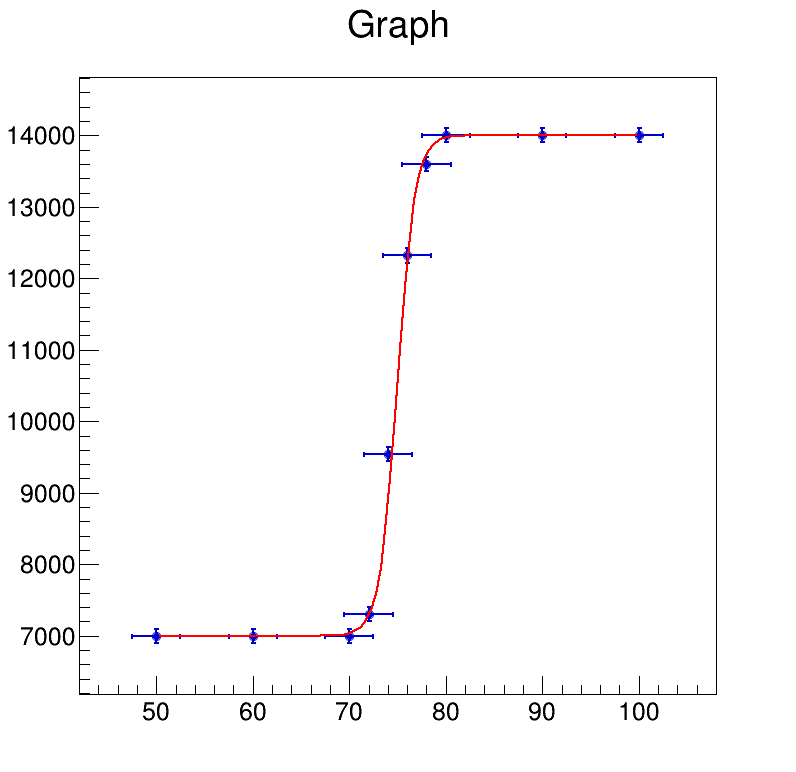

In [9]:
auto can = new TCanvas("can","can",800,800);
gr->Draw("APE");
func->Draw("same");
can->Draw();

Im Graphen oben sollten die Datenpunkte mit ihren Fehlern in blau zu sehen sein. Ausserdem sollte die Anpassung der zuvor definierten Funktion an die datenPunkte zu sehen sein.